In [1]:
#Import libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv


### Q: Influence of the weather on the sentiment listened to

In this question we look at different aspects of the weather to see if they influence the sentiment. These aspects include the average of: temperature, maximum temperature, minimum temperature and pressure.

With this we want to see if the general idea that positive music is streamed on summer(hot) days is correct.

We start off by reading several JSON files that contain information of a wheater station. In order to get a good average we used five different weather stations that are divided according to location (north, east, south, west, but also how close they are to the sea).

We also read a text file containing each day of the year, this is used later to create a dataframe.

In [2]:
#Read weatherinformation JSON files
edinburgh = json.loads(open('weatherUK/edinburgh.json', 'r').read())
liverpool = json.loads(open('weatherUK/liverpool.json', 'r').read())
london = json.loads(open('weatherUK/london.json', 'r').read())
notthingham = json.loads(open('weatherUK/notthingham.json', 'r').read())
plymouth = json.loads(open('weatherUK/plymouth.json', 'r').read())
text = open('days.txt', 'r')

A function is defined to get a list of a specific field in a json file.

In [3]:
#Strip weeks+{requested columns} from JSON files
def temperatureList(file,column):
    info = []
    for x in file['data']:
        info.append(x[column])
    return(info)


The following four cells are used to create a dataframe containing weeks+average of five weather stations, to get this dataframe we first: <br>
-Create dataframes for each wheater station containing the temperature (or pressure) of each day <br>
-Join all these dataframes toghether with a dataframe that contains dates. <br>
-We set the dates as index and transpose the dataframe, by doing this the  dataframe now has days as columns and wheaterstations as rows. <br>
-Now the mean for each day can be calculated and we have a dataframe containing dates+average temperature (or pressure)


In [13]:
#Create a DataFrame that contains average temperature measured over all weather stations per day
#This frame contains NaN values the weatherinformation JSON files are not complete
completedays = text.read().split()
daysFrame = pd.DataFrame({'day':completedays})
edin = pd.DataFrame({'edin':temperatureList(edinburgh, 'temperature')})
live = pd.DataFrame({'live':temperatureList(liverpool, 'temperature')})
lond = pd.DataFrame({'lond':temperatureList(london, 'temperature')})
nott = pd.DataFrame({'nott':temperatureList(notthingham, 'temperature')})
plym = pd.DataFrame({'plym':temperatureList(plymouth, 'temperature')})
data = daysFrame.join(edin).join(live).join(lond).join(nott).join(plym)
dayTemp = pd.DataFrame(data.set_index('day').transpose().mean())

,0
day,


In [15]:
edin

,edin
0,-6
1,1
2,4
3,4
4,6
...,...
278,2
279,10
280,10
281,2


In [14]:
#Create a DataFrame that contains average min temperature measured over all weather stations per day
#This frame contains NaN values the weatherinformation JSON files are not complete
edin = pd.DataFrame({'edin':temperatureList(edinburgh, 'temperature_min')})
live = pd.DataFrame({'live':temperatureList(liverpool, 'temperature_min')})
lond = pd.DataFrame({'lond':temperatureList(london, 'temperature_min')})
nott = pd.DataFrame({'nott':temperatureList(notthingham, 'temperature_min')})
plym = pd.DataFrame({'plym':temperatureList(plymouth, 'temperature_min')})
data = daysFrame.join(edin).join(live).join(lond).join(nott).join(plym)
mindayTemp = pd.DataFrame(data.set_index('day').transpose().mean())

,0
day,


In [6]:
#Create a DataFrame that contains average max temperature measured over all weather stations per day
#This frame contains NaN values the weatherinformation JSON files are not complete
edin = pd.DataFrame({'edin':temperatureList(edinburgh, 'temperature_max')})
live = pd.DataFrame({'live':temperatureList(liverpool, 'temperature_max')})
lond = pd.DataFrame({'lond':temperatureList(london, 'temperature_max')})
nott = pd.DataFrame({'nott':temperatureList(notthingham, 'temperature_max')})
plym = pd.DataFrame({'plym':temperatureList(plymouth, 'temperature_max')})
data = daysFrame.join(edin).join(live).join(lond).join(nott).join(plym)
maxdayTemp = pd.DataFrame(data.set_index('day').transpose().mean())

In [7]:
#Create a DataFrame that contains average pressure measured over all weather stations per day
#This frame contains NaN values the weatherinformation JSON files are not complete
edin = pd.DataFrame({'edin':temperatureList(edinburgh, 'pressure')})
live = pd.DataFrame({'live':temperatureList(liverpool, 'pressure')})
lond = pd.DataFrame({'lond':temperatureList(london, 'pressure')})
nott = pd.DataFrame({'nott':temperatureList(notthingham, 'pressure')})
plym = pd.DataFrame({'plym':temperatureList(plymouth, 'pressure')})
data = daysFrame.join(edin).join(live).join(lond).join(nott).join(plym)
pressureDf = pd.DataFrame(data.set_index('day').transpose().mean())

Now that the dataframes containing information about the wheather are created we need a dataframe containing information about the average compound segment of all tracks in the top 200 per day <br>
The following function creates a dataframe containing dates + average compound segment

In [8]:
#Create a DataFrame that contains the average compound segment of all tracks in the top 200 per day
days = [f for f in listdir('dataGbDay') if isfile(join('dataGbDay', f))]
totalcomp = []
for file in days:
    with open('dataGbDay/' + file, newline='', encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile)
        compound = []
        for index,row in enumerate(reader):
            try:
                compound.append(float(row[7]))
            except:
                compound.append(0)
        totalcomp.append(sum(compound)/len(compound))
totalcomp = daysFrame.join(pd.DataFrame(totalcomp))

In [16]:
totalcomp

,day,0
0,2019-12-31,0.263410
1,2019-12-30,0.195756
2,2019-12-29,0.209708
3,2019-12-28,0.221558
4,2019-12-27,0.206138
...,...,...
360,2019-01-05,0.277088
361,2019-01-04,0.266343
362,2019-01-03,0.262247
363,2019-01-02,0.293765


To gain insights about the relation between the wheater and compound segment we plot figures containing the compound segment on one y-axis and the wheather information on the other y-axis. <br>


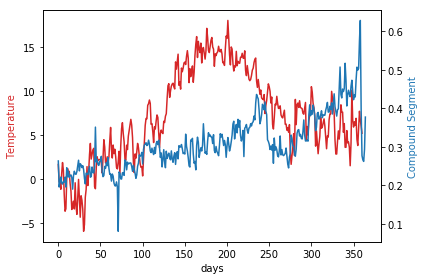

In [9]:
#Plot temperature and compound segment in one figure
fig, temp = plt.subplots()

color = 'tab:red'
temp.set_xlabel('days')
temp.set_ylabel('Temperature', color=color)
temp.plot(dayTemp.values, color=color)
temp.tick_params(axis='y')

comp = temp.twinx()

color = 'tab:blue'
comp.set_ylabel('Compound Segment', color=color)
comp.plot(totalcomp[0], color=color)
comp.tick_params(axis='y')

fig.tight_layout()
plt.show()

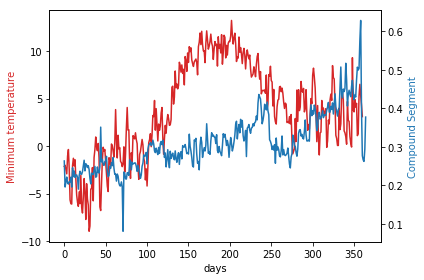

In [10]:
#Plot minimal temperature and compound segment in one figure
fig, temp = plt.subplots()

color = 'tab:red'
temp.set_xlabel('days')
temp.set_ylabel('Minimum temperature', color=color)
temp.plot(mindayTemp.values, color=color)
temp.tick_params(axis='y')

comp = temp.twinx()

color = 'tab:blue'
comp.set_ylabel('Compound Segment', color=color)
comp.plot(totalcomp[0], color=color)
comp.tick_params(axis='y')

fig.tight_layout()
plt.show()

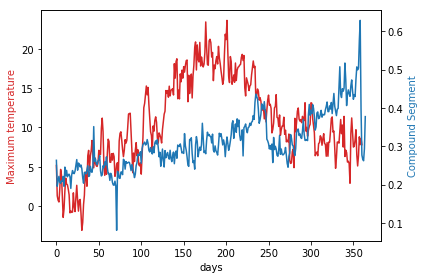

In [11]:
#Plot max temperature and compound segment in one figure
fig, temp = plt.subplots()

color = 'tab:red'
temp.set_xlabel('days')
temp.set_ylabel('Maximum temperature', color=color)
temp.plot(maxdayTemp.values, color=color)
temp.tick_params(axis='y')

comp = temp.twinx()

color = 'tab:blue'
comp.set_ylabel('Compound Segment', color=color)
comp.plot(totalcomp[0], color=color)
comp.tick_params(axis='y')

fig.tight_layout()
plt.show()

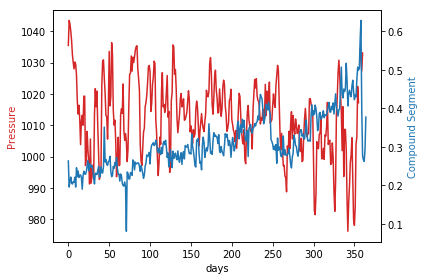

In [12]:
#Plot pressure and compound segment in one figure
fig, temp = plt.subplots()

color = 'tab:red'
temp.set_xlabel('days')
temp.set_ylabel('Pressure', color=color)
temp.plot(pressureDf.values, color=color)
temp.tick_params(axis='y')

comp = temp.twinx()

color = 'tab:blue'
comp.set_ylabel('Compound Segment', color=color)
comp.plot(totalcomp[0], color=color)
comp.tick_params(axis='y')

fig.tight_layout()
plt.show()

In none of the four figures a relation between the wheater and the average compound segment can be seen. We can guarantee there's no relationship, but the information we have doesn't show any relationship. <br>
However, we can conclude that hot/summer days do not necessarily lead to a higher average sentiment. 